In [4]:
%pylab

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [22]:
rad = 180./pi
theta_r=180
itheta=2*theta_r+0.5
theta_sun=180./rad
R_MW=55.0 #milky way diameter 
Rinner=2.0

R_sun=25.
X_sun=R_sun*(cos(theta_sun))
Y_sun=R_sun*(sin(theta_sun))
Z_sun=0.0

VR=220.
VR_sun=VR
VX_sun=-VR*sin(theta_sun)
VY_sun=VR*cos(theta_sun)
VZ_sun=0.

iwrite=0

In [30]:
def aatan(py,px):
    R=2*pi
    pxx=px
    pyy=py
    if px==0:
        pxx=0.000001
    if py==0:
        pyy=0.000001
    temp = arctan(abs(pyy/pxx))
    if pxx>=0. and pyy>=0.:
        return(temp)
    if pxx>=0. and pyy<0.:
        return(R-temp)
    if pxx<0. and pyy>=0.:
        return(pi-temp)
    if pxx<0. and pyy<0.:
        return(pi+temp)

In [31]:
IDate=269
IShift=14
IDate=IDate-IShift

Date=IDate/365.*2*np.pi
R_earth=1.58e-8
V_earth=30.0
alpha=28./rad

X_earth = X_sun + R_earth*cos(Date)
Y_earth = Y_sun + sin(alpha)*V_earth*cos(Date)
Z_earth = Z_sun + cos(alpha)*R_earth*sin(Date)

In [32]:
VX_earth=VX_sun - V_earth*sin(Date)
VY_earth=VY_sun + sin(alpha)*R_earth*sin(Date)
VZ_earth=VZ_sun + cos(alpha)*V_earth*cos(Date)

In [51]:
dtheta=1.0
theta_range=arange(-theta_r,theta_r,dtheta)
rr_range=arange(1.5,2*R_MW,1)

V_array=[]

for theta in theta_range:
    for rr in rr_range:
        Xwrt_sun=rr*cos(theta/rad)
        Ywrt_sun=rr*sin(theta/rad)
        Zwrt_sun=0
        Rwrt_sun=sqrt(Xwrt_sun**2+Ywrt_sun**2)

        Xwrt_gc=Xwrt_sun - R_sun
        Ywrt_gc=Ywrt_sun
        Zwrt_gc=0
        Rwrt_gc=sqrt(Xwrt_gc**2+Ywrt_sun**2)

        if (Rwrt_gc>R_MW) or (Rwrt_gc<Rinner):
            break
        VRwrt_gc=VR
        if (Rwrt_gc<10.):
            VRwrt_gc=VR*sqrt(Rwrt_gc)/sqrt(10)
        theta_gc=aatan(Xwrt_gc,Ywrt_gc)
        VXwrt_gc=-VRwrt_gc*sin(theta_gc);    #star speed wrt gc
        VYwrt_gc= VRwrt_gc*cos(theta_gc);

        RR=sqrt(R_sun*R_sun+rr*rr-2.0*R_sun*rr*cos(theta/rad)); #distance to rr from GC
        Vdot=VRwrt_gc*R_sun/RR*sin(theta/rad)-VR*sin(theta/rad);
        Vdot1=(VX_sun*Xwrt_sun   +  VY_sun*Ywrt_sun)/rr;
        Vdot2=(VXwrt_gc*Xwrt_sun +  VYwrt_gc*Ywrt_sun)/rr;
        Vdot=Vdot1-Vdot2;

        VEdot1=(VX_earth*Xwrt_sun +VY_earth*Ywrt_sun + VZ_earth*Zwrt_sun)/rr;
        VEdot2=(VXwrt_gc*Xwrt_sun +  VYwrt_gc*Ywrt_sun)/rr;
        VEdot=VEdot1-VEdot2;
        if rr==1.5:
            V_array.append(-Vdot+VEdot)
        

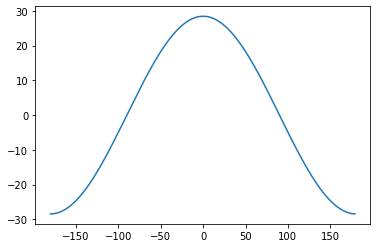

In [52]:
plt.plot(theta_range,V_array)

In [53]:
np.save("earth_redshift.npy",np.array(V_array))

In [55]:
V_array[10:80]
V_array.shape

AttributeError: 'list' object has no attribute 'shape'